<table style="border-collapse:collapse; border-color:#ccc; border-spacing:0; align-self:center">
    <thead>
        <tr>
           <th colspan="2;" style="background-color:#f0f0f0; border-color:#ccc; border-style:solid;border-width:1px; color:#333;font-family:Arial, sans-serif; font-size:14px; font-weight:bold; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Information</th>
        </tr>
     </thead>
     <tbody>
        <tr>
           <td style="background-color:#f9f9f9; border-color:#ccc; border-style:solid; border-width:1px; color:#333; font-family:Arial, sans-serif;font-size:14px; font-weight:bold; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Created by:</td>
           <td style="background-color:#f9f9f9; border-color:#ccc; border-style:solid; border-width:1px; color:#333; font-family:Arial, sans-serif;font-size:14px; overflow:hidden;padding:10px 5px;text-align:left; vertical-align:middle; word-break:normal">Brayan A. Quiceno</td>
        </tr>
        <tr>
          <td style="background-color:#fff; border-color:#ccc; border-style:solid; border-width:1px; color:#333;font-family:Arial, sans-serif;font-size:14px; font-weight:bold; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Group:</td>
          <td style="background-color:#fff; border-color:#ccc; border-style:solid; border-width:1px; color:#333; font-family:Arial, sans-serif;font-size:14px; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Geofísica y Ciencias de la Computación</td>
        </tr>
        <tr>
          <td style="background-color:#f9f9f9; border-color:#ccc; border-style:solid; border-width:1px; color:#333;font-family:Arial, sans-serif;font-size:14px; font-weight:bold; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Place:</td>
          <td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Institución Universitaria ITM</td>
        </tr>
        <tr>
          <td style="background-color:#fff; border-color:#ccc; border-style:solid; border-width:1px; color:#333;font-family:Arial, sans-serif;font-size:14px; font-weight:bold; overflow:hidden; padding:10px 5px; text-align:left; vertical-align:middle; word-break:normal">Location:</td>
          <td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px; color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Medellín, Antioquia, Colombia</td>
        </tr>
     </tbody>
</table>

#### Import the Required Libraries

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygimli as pg

#### Load Dataset

In [2]:
filename = "ERT with Topography Effect.dat"
dataset = pg.physics.ert.load(filename)

#### Calculate Criteria

In [75]:
measurements = dataset.size()

x = np.array(pg.x(dataset))
z = np.array(pg.z(dataset))

A = np.array(dataset['a'])
B = np.array(dataset['b'])
M = np.array(dataset['m'])
N = np.array(dataset['n'])
ABMN = np.vstack((A, B, M, N)).T

ξ = []
υ = []
ζ = []
for i in range(measurements):
    ξ.append(max(ABMN[i]) - min(ABMN[i]))
    υ.append((max(ABMN[i]) + min(ABMN[i]))/2)
    
    summation = 0
    for j in range(4):
        elevation = z[ABMN[i, j]]
        summation += elevation
    ζ.append(summation/4)

ρa = np.array(dataset["rhoa"])   
data = np.vstack((ζ, ξ, υ, ρa)).T

dataframe = pd.DataFrame(data, columns=[r"$\zeta$", r"$\xi$", r"$\upsilon$", r"$\rho_a$"])

dataframe = dataframe.sort_values([r"$\zeta$", r"$\xi$", r"$\upsilon$"], 
                                  ascending=[False, True, True])

In [93]:
print(dataframe.to_markdown())

|     |   $\zeta$ |   $\xi$ |   $\upsilon$ |   $\rho_a$ |
|----:|----------:|--------:|-------------:|-----------:|
|  10 |   121.2   |       3 |         11.5 |   15.9049  |
|  11 |   121.2   |       3 |         12.5 |   23.2762  |
|  12 |   121.2   |       3 |         13.5 |   18.8319  |
|  13 |   121.2   |       3 |         14.5 |   20.6055  |
|  14 |   121.2   |       3 |         15.5 |   17.7142  |
|  15 |   121.2   |       3 |         16.5 |   20.9984  |
|  45 |   121.2   |       6 |         13   |   15.5483  |
|  46 |   121.2   |       6 |         14   |   13.4225  |
|  47 |   121.2   |       6 |         15   |   12.365   |
|  16 |   120.962 |       3 |         17.5 |   11.521   |
|  48 |   120.962 |       6 |         16   |   10.8238  |
|  77 |   120.962 |       9 |         14.5 |   10.3744  |
|   9 |   120.89  |       3 |         10.5 |   22.6414  |
|  44 |   120.89  |       6 |         12   |    9.05369 |
|  76 |   120.89  |       9 |         13.5 |    9.21989 |
|  49 |   120.

#### Show Data Distribution

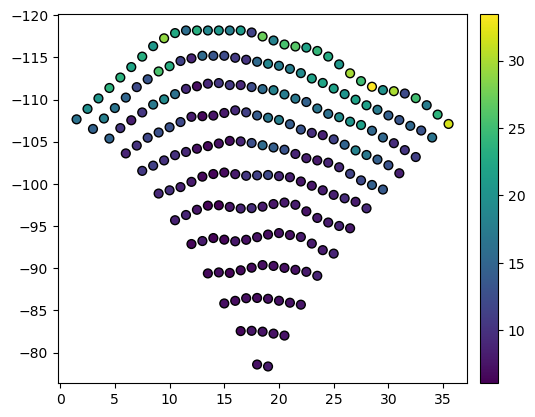

In [103]:
plt.scatter(dataframe[r"$\upsilon$"], (dataframe[r"$\xi$"]-dataframe[r"$\zeta$"]), c=dataframe[r"$\rho_a$"], s=40, 
            edgecolors="k").axes.invert_yaxis()
colorbar = plt.colorbar(orientation="vertical",
                  pad=0.025, shrink=1, aspect=20)

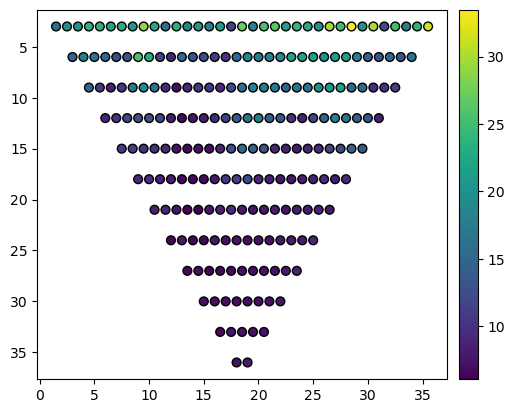

In [104]:
plt.scatter(dataframe[r"$\upsilon$"], (dataframe[r"$\xi$"]), c=dataframe[r"$\rho_a$"], s=40, 
            edgecolors="k").axes.invert_yaxis()
colorbar = plt.colorbar(orientation="vertical",
                  pad=0.025, shrink=1, aspect=20)

In [85]:
data

array([[110.66      ,   3.        ,   1.5       ,  16.36109461],
       [111.9       ,   3.        ,   2.5       ,  19.6164825 ],
       [113.14      ,   3.        ,   3.5       ,  20.36502034],
       [114.38      ,   3.        ,   4.5       ,  23.67879219],
       [115.62      ,   3.        ,   5.5       ,  23.53826897],
       [116.86      ,   3.        ,   6.5       ,  22.05471584],
       [118.1       ,   3.        ,   7.5       ,  23.29348086],
       [119.34      ,   3.        ,   8.5       ,  20.72400945],
       [120.27      ,   3.        ,   9.5       ,  28.93523767],
       [120.89      ,   3.        ,  10.5       ,  22.64142515],
       [121.2       ,   3.        ,  11.5       ,  15.90492691],
       [121.2       ,   3.        ,  12.5       ,  23.27621435],
       [121.2       ,   3.        ,  13.5       ,  18.83193431],
       [121.2       ,   3.        ,  14.5       ,  20.60551817],
       [121.2       ,   3.        ,  15.5       ,  17.71419946],
       [121.2       ,   3